In [3]:
import bt
import pandas
import matplotlib
import matplotlib.pyplot as plt
import talib

In [4]:
matplotlib.use('TkAgg')
%matplotlib inline

In [5]:
stock_symbol = 'goog'
start_date = '2019-11-1'
end_date = '2020-12-1'
sma_time_period = 20

In [6]:
price_data = bt.get(stock_symbol, start=start_date, end=end_date)
sma = price_data.rolling(sma_time_period).mean()

In [9]:
# Short Signal
EMA_short = talib.EMA(price_data[stock_symbol], timeperiod=10).to_frame()
# Long Signal
EMA_long = talib.EMA(price_data[stock_symbol], timeperiod=40).to_frame()

In [12]:
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0
signal

,0
Date,
2019-11-01,0.000000
2019-11-04,0.000000
2019-11-05,0.000000
2019-11-06,0.000000
2019-11-07,0.000000
...,...
2020-11-24,1660.654522
2020-11-25,1666.058206
2020-11-27,1672.259754


### Construct an EMA crossover signal
Trend-following strategies believe that "the trend is your friend," and use signals to indicate the trend and profit by riding it.

You want to build and backtest a trend-following strategy. First, you decide to use two EMAs (exponential moving averages) to construct the signal. When the shorter-term EMA, EMA_short, is larger than the longer-term EMA, EMA_long, you will enter long positions in the market. Vice versa, when EMA_short is smaller than EMA_long, you will enter short positions.

In [14]:
signal[EMA_short > EMA_long] = 1
signal[~(EMA_short > EMA_long)] = -1

In [15]:
signal.value_counts()

 1.0    178
-1.0     95
dtype: int64

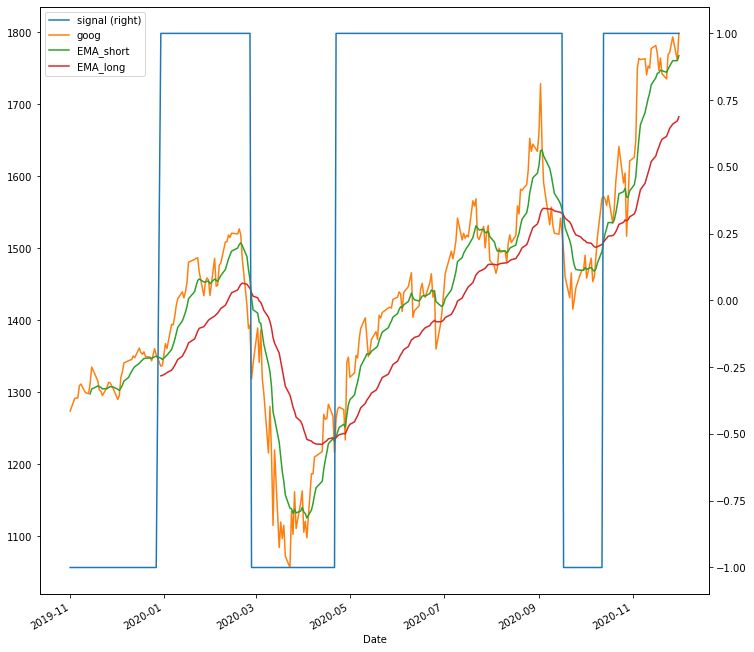

In [19]:
combined_df = bt.merge(signal, price_data, EMA_short, EMA_long)
combined_df.columns = ['signal', 'goog', 'EMA_short', 'EMA_long']
combined_df.plot(secondary_y = ['signal'],figsize=(12,12))
plt.show()

In [21]:
signal.rename(columns = {0: 'goog'}, inplace=True)

In [24]:
bt_strategy = bt.Strategy('EMA_CROSSOVER',
                         [
                             bt.algos.WeighTarget(signal),
                             bt.algos.Rebalance()
                         ])

In [26]:
bt_backtest = bt.Backtest(bt_strategy, price_data)

In [27]:
bt_results = bt.run(bt_backtest)

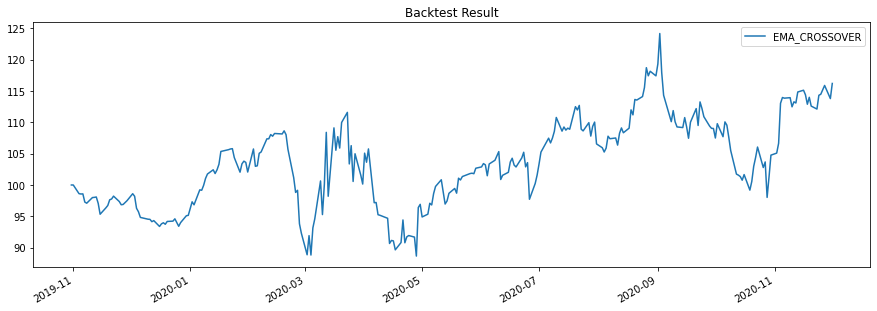

In [30]:
bt_results.plot(title = 'Backtest Result')
plt.show()